In [150]:
import pandas as pd 
from sklearn.pipeline import Pipeline
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer, RobustScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [2]:
data = datasets.load_breast_cancer()


In [3]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
type(data)

sklearn.utils._bunch.Bunch

In [6]:
df = pd.DataFrame(data.data,columns=data.feature_names)

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [10]:
df["target"] = data.target

In [11]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [15]:
target_name = list(data.target_names)
df["target_names"] =df["target"].apply(lambda x: target_name[x])

In [16]:
df["target_names"].describe()

count        569
unique         2
top       benign
freq         357
Name: target_names, dtype: object

In [17]:
df[df["target_names"]=="benign"].count()

mean radius                357
mean texture               357
mean perimeter             357
mean area                  357
mean smoothness            357
mean compactness           357
mean concavity             357
mean concave points        357
mean symmetry              357
mean fractal dimension     357
radius error               357
texture error              357
perimeter error            357
area error                 357
smoothness error           357
compactness error          357
concavity error            357
concave points error       357
symmetry error             357
fractal dimension error    357
worst radius               357
worst texture              357
worst perimeter            357
worst area                 357
worst smoothness           357
worst compactness          357
worst concavity            357
worst concave points       357
worst symmetry             357
worst fractal dimension    357
target                     357
target_names               357
dtype: i

In [19]:
df.drop("target_names",axis=1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [20]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target', 'target_names'],
      dtype='object')

<AxesSubplot:>

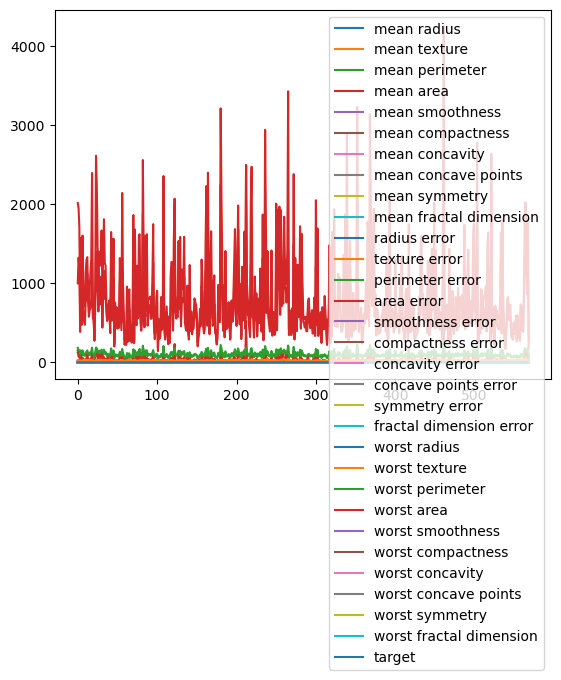

In [21]:
df.plot()

In [24]:
pipe = Pipeline([("scaler",StandardScaler()),("rf",RandomForestClassifier())])

In [25]:
df = df.drop("target",axis=1)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = df.drop("target_names",axis=1)
Y = df["target_names"]

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [29]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
237,20.48,21.46,132.50,1306.0,0.08355,0.08348,0.09042,0.06022,0.1467,0.05177,...,24.22,26.17,161.7,1750.0,0.1228,0.2311,0.3158,0.14450,0.2238,0.07127
10,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,...,19.19,33.88,123.8,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
255,13.96,17.05,91.43,602.4,0.10960,0.12790,0.09789,0.05246,0.1908,0.06130,...,16.39,22.07,108.1,826.0,0.1512,0.3262,0.3209,0.13740,0.3068,0.07957
521,24.63,21.60,165.50,1841.0,0.10300,0.21060,0.23100,0.14710,0.1991,0.06739,...,29.92,26.93,205.7,2642.0,0.1342,0.4188,0.4658,0.24750,0.3157,0.09671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,12.63,20.76,82.15,480.4,0.09933,0.12090,0.10650,0.06021,0.1735,0.07070,...,13.33,25.47,89.0,527.4,0.1287,0.2250,0.2216,0.11050,0.2226,0.08486
207,17.01,20.26,109.70,904.3,0.08772,0.07304,0.06950,0.05390,0.2026,0.05223,...,19.80,25.05,130.0,1210.0,0.1111,0.1486,0.1932,0.10960,0.3275,0.06469
274,17.93,24.48,115.20,998.9,0.08855,0.07027,0.05699,0.04744,0.1538,0.05510,...,20.92,34.69,135.1,1320.0,0.1315,0.1806,0.2080,0.11360,0.2504,0.07948
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.67,27.95,102.8,759.4,0.1786,0.4166,0.5006,0.20880,0.3900,0.11790


In [30]:
y_train

237    malignant
10     malignant
1      malignant
255    malignant
521    malignant
         ...    
111       benign
207    malignant
274    malignant
47     malignant
564    malignant
Name: target_names, Length: 455, dtype: object

In [31]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestClassifier())])

In [136]:
y_rf_pred = pipe.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [34]:
accuracy_score(y_test,y_rf_pred)

0.9385964912280702

In [35]:
f1_score(y_test,y_rf_pred,average="weighted")

0.9384010900218638

In [42]:
precision_score(y_test, y_rf_pred,pos_label="benign")

0.9473684210526315

In [46]:
recall_score(y_test,y_rf_pred, pos_label="malignant")

0.8974358974358975

In [48]:
f1_score(y_test,y_rf_pred,pos_label="benign")

0.9536423841059603

In [50]:
pipe_ada = Pipeline([("scalar",StandardScaler()),("ada",AdaBoostClassifier())])

In [51]:
pipe_ada.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('ada', AdaBoostClassifier())])

In [52]:
y_ada_predict = pipe_ada.predict(X_test)

In [65]:
class Metrics:

    def __init__(self, y_test, y_pred, target_names):
        self.y_test = y_test
        self.y_pred = y_pred
        self.target_names= target_names

    def get_metrics(self):
    
        print(f"Accuracy score for {accuracy_score(self.y_test, self.y_pred)}")
        for tn in self.target_names:
            print(f"this is for {tn}")
            print(f"F1 score {f1_score(self.y_test,self.y_pred,pos_label=tn)}")
            print(f"Precision score {precision_score(self.y_test, self.y_pred,pos_label=tn)}")
            print(f"Recall scores {recall_score(self.y_test,self.y_pred, pos_label=tn)}")
            

        

In [66]:
rf_metrics = Metrics(y_test, y_rf_pred, target_names=target_name)

In [67]:
rf_metrics.get_metrics()

Accuracy score for 0.9385964912280702
this is for malignant
F1 score 0.9090909090909091
Precision score 0.9210526315789473
Recall scores 0.8974358974358975
this is for benign
F1 score 0.9536423841059603
Precision score 0.9473684210526315
Recall scores 0.96


In [68]:
ada_metrics = Metrics(y_test, y_ada_predict, target_name)

In [69]:
ada_metrics.get_metrics()

Accuracy score for 0.9473684210526315
this is for malignant
F1 score 0.9210526315789475
Precision score 0.9459459459459459
Recall scores 0.8974358974358975
this is for benign
F1 score 0.9605263157894737
Precision score 0.948051948051948
Recall scores 0.9733333333333334


In [70]:
from sklearn.model_selection import GridSearchCV


In [74]:
ss  = StandardScaler()
X_ss = ss.fit_transform(df.drop("target_names",axis=1))
# gs_cv.fit()

In [75]:
X_ss

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [76]:
X_ss_train, X_ss_test, y_train, y_test = train_test_split(X_ss, Y, test_size=0.2)

In [90]:
from sklearn.metrics import make_scorer
custom_scorer = make_scorer(precision_score, greater_is_better=True,  pos_label="malignant")
custom_recall = make_scorer(recall_score, greater_is_better=True,  pos_label="malignant")

In [112]:
gs_cv = GridSearchCV(estimator= AdaBoostClassifier(), param_grid=params,n_jobs=-1, scoring=custom_recall)

In [113]:
gs_cv.fit(X_ss_train, y_train)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


ValueError: Invalid parameter 'max_depth' for estimator AdaBoostClassifier(). Valid parameters are: ['algorithm', 'base_estimator', 'estimator', 'learning_rate', 'n_estimators', 'random_state'].

In [115]:
# RandomForestClassifier(n_estimators=100, max_depth=None, n_job=-1)
params = {
    # "n_estimators": [10,50, 100, 200, 500, 1000],
    "max_depth": [10, 50, 100, 200, 500, 1000],
    # "n_jobs": [-1]
}

In [116]:
params

{'max_depth': [10, 50, 100, 200, 500, 1000]}

In [100]:
gs_cv.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=200, n_jobs=-1)

In [101]:
gs_cv.best_params_

{'max_depth': 10, 'n_estimators': 200, 'n_jobs': -1}

In [102]:
gs_cv.best_score_

0.937689393939394

In [103]:
gs_cv.param_grid

{'n_estimators': [10, 50, 100, 200, 500, 1000],
 'max_depth': [10, 50, 100, 200, 500, 1000],
 'n_jobs': [-1]}

In [111]:
gs_cv.best_score_

0.937689393939394

In [114]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
DecisionTreeClassifier(

In [117]:
gs_cv = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, n_jobs=-1)

In [120]:
gs_cv.fit(X_ss, Y)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 50, 100, 200, 500, 1000]})

In [121]:
gs_cv.best_score_

0.9243906225741345

In [123]:
gs_cv.cv_results_

{'mean_fit_time': array([0.01675096, 0.02279053, 0.01772923, 0.01361732, 0.01496162,
        0.01408863]),
 'std_fit_time': array([0.00661845, 0.01168493, 0.00717563, 0.00229828, 0.00351565,
        0.00250656]),
 'mean_score_time': array([0.00181322, 0.00145907, 0.00161915, 0.00121698, 0.00267563,
        0.00152917]),
 'std_score_time': array([0.00033998, 0.00036788, 0.00064181, 0.00014162, 0.00110398,
        0.00048707]),
 'param_max_depth': masked_array(data=[10, 50, 100, 200, 500, 1000],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 10},
  {'max_depth': 50},
  {'max_depth': 100},
  {'max_depth': 200},
  {'max_depth': 500},
  {'max_depth': 1000}],
 'split0_test_score': array([0.9122807 , 0.9122807 , 0.90350877, 0.9122807 , 0.9122807 ,
        0.9122807 ]),
 'split1_test_score': array([0.9122807 , 0.92982456, 0.89473684, 0.90350877, 0.89473684,
        0.90350877]),
 'split2_test_score': 

In [125]:
from sklearn.metrics import classification_report

In [ ]:
# SVC()

In [126]:
gs_cv = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, n_jobs=-1)

In [127]:
gs_cv.fit(X_ss,Y)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 50, 100, 200, 500, 1000]})

In [128]:
y_gs_pred = gs_cv.predict(X_train) 

/home/arunachalam/.local/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [137]:
print(classification_report(y_test,y_rf_pred, target_names=target_name))

              precision    recall  f1-score   support

   malignant       0.97      1.00      0.99        71
      benign       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [139]:
from sklearn.decomposition import PCA

In [163]:
pipe_ex = Pipeline([("scaler",StandardScaler()),("pca",PCA()),("rf",RandomForestClassifier(n_estimators=200,max_depth=30,n_jobs=-1))])

In [164]:
pipe_ex.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('rf',
                 RandomForestClassifier(max_depth=30, n_estimators=200,
                                        n_jobs=-1))])

In [165]:
y_pred = pipe_ex.predict(X_test)

In [166]:
print(classification_report(y_test,y_pred, target_names=target_name))

              precision    recall  f1-score   support

   malignant       0.92      0.92      0.92        71
      benign       0.86      0.86      0.86        43

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.89      0.89      0.89       114

